In [1]:
import pandas as pd
from pandas import IndexSlice as idx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [15]:
mpl.use("TkAgg")

In [10]:
observations = pd.read_csv("../data/Sweden_Zone3_Obs.csv", index_col=0, infer_datetime_format=True)
variables = observations.columns.drop(["is_origin","horizon"])
observations = observations[variables]

In [52]:
power = pd.read_csv("../data/Sweden_Zone3_Power.csv", index_col=0, infer_datetime_format=True)
power= power[["wind_power"]]

In [165]:
ensembles:pd.DataFrame = pd.read_csv("../data/Sweden_Zone3_Ensembles.csv", infer_datetime_format=True)
ensembles = ensembles.reset_index().pivot(index=["horizon","time","number"], columns=[])
ensembles.sort_index(level=[0,1], inplace=True)
ensembles = ensembles[variables]
ensembles = ensembles.loc[(6,slice(None),slice(None))]
ensembles.index = ensembles.index.droplevel(0)
ensembles.head(10)

u100      v100         t2m            sp  \
time                number                                                 
2015-01-05 06:00:00 1       4.019848 -5.352515  269.854986  99875.342570   
                    2       3.813511 -4.667612  269.430968  99855.629401   
                    3       3.959906 -4.704053  269.697270  99872.559931   
                    4       4.185481 -4.861846  269.609614  99880.441530   
                    5       3.789896 -5.189184  269.644013  99914.347082   
                    6       4.566331 -4.588765  269.653508  99807.449096   
                    7       3.771036 -5.123367  269.531847  99829.726713   
                    8       4.371280 -4.477014  269.774570  99876.275173   
                    9       3.930915 -4.930502  269.566865  99840.073164   
                    10      3.997897 -4.817091  269.809728  99860.998157   

                               speed  
time                number            
2015-01-05 06:00:00 1       6.890505  
                    2       6.270919  
                    3       6.396227  
                    4       6.617569  
                    5       6.603011  
                    6       6.690406  
                    7       6.624017  
                    8       6.444140  
                    9       6.528939  
                    10      6.503080

In [167]:
ensembles.index.get_level_values(0).map(ensembles.groupby(level=0).std().to_dict("index")).to_frame().set_index(ensembles.index).apply(func=lambda d: d[0].values(), axis=1, result_type="expand").set_axis(axis=1, labels=ensembles.columns)

u100      v100       t2m         sp     speed
time                number                                                   
2015-01-05 06:00:00 1       0.267388  0.256502  0.107575  27.034454  0.152650
                    2       0.267388  0.256502  0.107575  27.034454  0.152650
                    3       0.267388  0.256502  0.107575  27.034454  0.152650
                    4       0.267388  0.256502  0.107575  27.034454  0.152650
                    5       0.267388  0.256502  0.107575  27.034454  0.152650
...                              ...       ...       ...        ...       ...
2019-08-31 06:00:00 46      0.306657  0.199517  0.096023  23.791008  0.259783
                    47      0.306657  0.199517  0.096023  23.791008  0.259783
                    48      0.306657  0.199517  0.096023  23.791008  0.259783
                    49      0.306657  0.199517  0.096023  23.791008  0.259783
                    50      0.306657  0.199517  0.096023  23.791008  0.259783

[85000 rows x 5 columns]

In [168]:
ensembles.groupby(level=0).agg(["mean","std"])

u100                v100                   t2m  \
                         mean       std      mean       std        mean   
time                                                                      
2015-01-05 06:00:00  4.028289  0.267388 -4.895834  0.256502  269.640413   
2015-01-06 06:00:00 -0.861674  0.298017  6.691041  0.141423  270.342536   
2015-01-07 06:00:00  1.130266  0.197821  7.891785  0.141059  272.937578   
2015-01-08 06:00:00  5.500188  0.405860  9.762972  0.317525  275.769374   
2015-01-09 06:00:00  7.319040  0.191130  1.338852  0.273683  271.781636   
...                       ...       ...       ...       ...         ...   
2019-08-27 06:00:00 -0.133055  0.145569  3.390483  0.116855  290.277134   
2019-08-28 06:00:00 -3.322076  0.145876  3.649640  0.217189  291.095814   
2019-08-29 06:00:00 -0.867333  0.333958  5.130953  0.230615  291.131987   
2019-08-30 06:00:00  5.480215  0.313283  3.219094  0.212289  287.536121   
2019-08-31 06:00:00  3.807098  0.306657  6.190148  0.199517  288.881954   

                                          sp                 speed            
                          std           mean        std       mean       std  
time                                                                          
2015-01-05 06:00:00  0.107575   99860.537877  27.034454   6.576150  0.152650  
2015-01-06 06:00:00  0.163096  100307.737228  29.527745   6.890976  0.141165  
2015-01-07 06:00:00  0.086478   99264.047603  35.825268   8.482696  0.131987  
2015-01-08 06:00:00  0.194365   98020.889133  35.284322  11.349348  0.204933  
2015-01-09 06:00:00  0.156979   97408.712600  43.405854   7.845264  0.169758  
...                       ...            ...        ...        ...       ...  
2019-08-27 06:00:00  0.083076  100210.181195  15.505428   4.042820  0.111499  
2019-08-28 06:00:00  0.096714   99831.698227  16.815096   5.440233  0.156239  
2019-08-29 06:00:00  0.109569   99138.411366  24.070451   5.677662  0.249445  
2019-08-30 06:00:00  0.147076   99556.972251  20.150540   6.657663  0.205173  
2019-08-31 06:00:00  0.096023   99606.951856  23.791008   7.330778  0.259783  

[1700 rows x 10 columns]

In [130]:
dates = observations.index[3:2*365*8:8]

In [167]:
ensembles.loc[(dates,slice(None)), "speed"].groupby(level=0).mean()

time
2015-01-06 00:00:00     4.897401
2015-01-07 00:00:00    10.445295
2015-01-08 00:00:00     9.033480
2015-01-09 00:00:00     8.650665
2015-01-10 00:00:00     4.071428
                         ...    
2016-01-01 00:00:00     7.495686
2016-01-02 00:00:00     7.035401
2016-01-03 00:00:00     5.966291
2016-01-04 00:00:00     4.235032
2016-01-05 00:00:00     5.334417
Name: speed, Length: 365, dtype: float64

2015-01-06 00:00:00


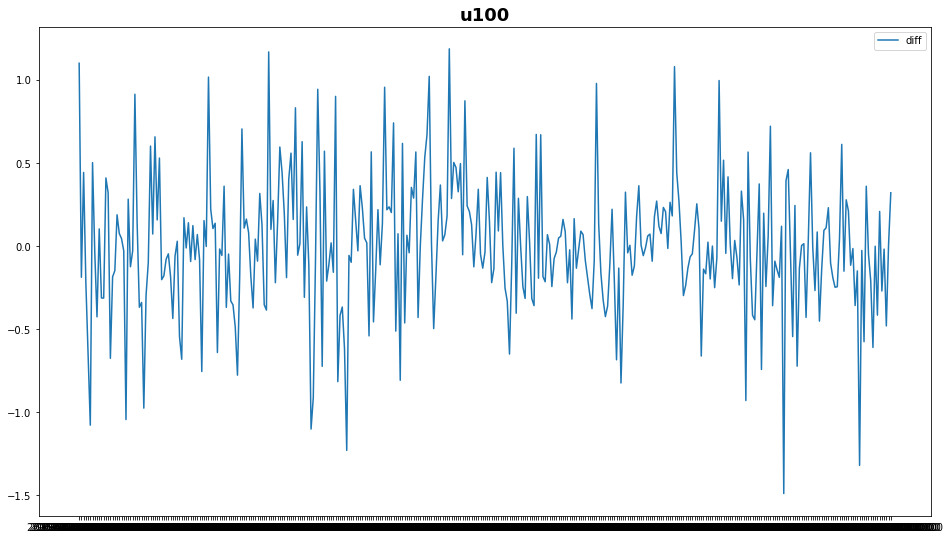

In [170]:
plt.figure(figsize=(16,9))
variable = "u100"
dates = observations.index[7:365*8:8]
print(dates[0])
#plt.plot(observations.loc[dates,variable], label="obs")
#plt.plot(ensembles.loc[(dates,1),variable].droplevel(1), label="ens")
plt.plot(observations.loc[dates, variable]-ensembles.loc[(dates,slice(None)), variable].groupby(level=0).mean(), label="diff")
plt.legend()
plt.title(variable, fontsize=18, fontweight="bold")
plt.show()

In [176]:
observations_power = pd.read_csv("../data/Sweden_Zone3_Power.csv", index_col=0, infer_datetime_format=True)
observations_power = observations_power[observations_power.columns.drop("horizon")]

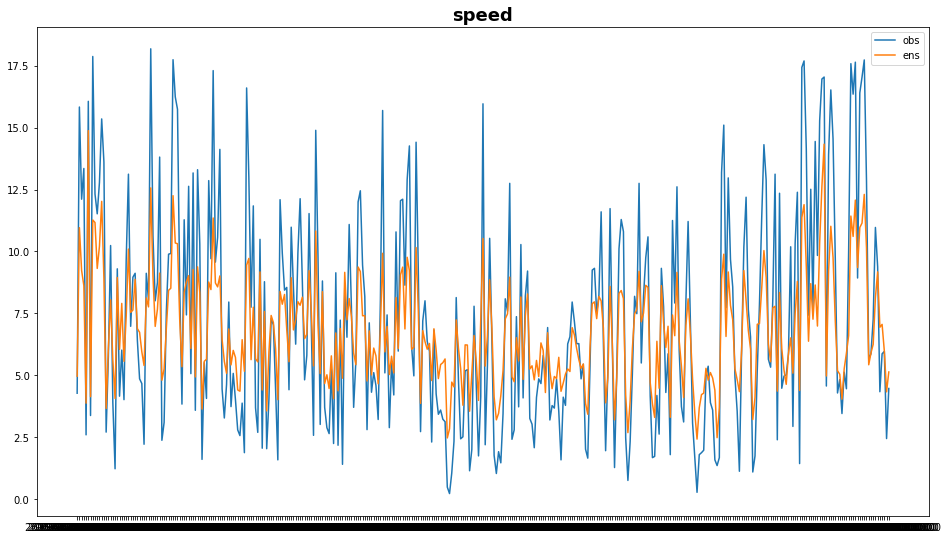

In [178]:
plt.figure(figsize=(16,9))
variable = "speed"
dates = observations.index[7:365*8:8]
plt.plot(0.01*observations_power.loc[dates,"wind_power"], label="obs")
plt.plot(ensembles.loc[(dates,1),variable].droplevel(1), label="ens")
plt.legend()
plt.title(variable, fontsize=18, fontweight="bold")
plt.show()

In [183]:
ensembles.reset_index().pivot(index="time", columns="number")

u100                                          \
number                     1         2         3         4         5    
time                                                                    
2015-01-05 03:00:00  5.214333  5.092335  4.837639  5.522214  5.146141   
2015-01-05 06:00:00  4.019848  3.813511  3.959906  4.185481  3.789896   
2015-01-05 09:00:00  2.811946  2.232991  2.646137  3.094046  2.226336   
2015-01-05 12:00:00  1.626782  1.177158  1.795907  1.765219  0.933635   
2015-01-05 15:00:00  1.097247  0.139816  1.622777  0.565697  0.095970   
...                       ...       ...       ...       ...       ...   
2019-08-31 09:00:00  3.823589  3.914734  4.415682  4.790075  4.096368   
2019-08-31 12:00:00  2.416398  2.315013  2.942546  3.563442  2.585510   
2019-08-31 15:00:00  1.197800  1.433638  1.884588  2.682458  1.685335   
2019-08-31 18:00:00 -1.146679 -1.085435 -0.546993 -0.034425 -0.401329   
2019-08-31 21:00:00 -1.851262 -1.403036 -1.091396 -1.081923 -0.581328   

                                                                       ...  \
number                     6         7         8         9         10  ...   
time                                                                   ...   
2015-01-05 03:00:00  5.259253  4.941247  5.445208  5.099366  5.266688  ...   
2015-01-05 06:00:00  4.566331  3.771036  4.371280  3.930915  3.997897  ...   
2015-01-05 09:00:00  3.462251  2.789676  3.383143  2.591210  2.754304  ...   
2015-01-05 12:00:00  2.229357  1.896175  2.360089  1.559265  1.393439  ...   
2015-01-05 15:00:00  1.182769  2.004106  0.816253  1.213776  0.470310  ...   
...                       ...       ...       ...       ...       ...  ...   
2019-08-31 09:00:00  4.308026  4.380724  4.093038  5.020520  4.429752  ...   
2019-08-31 12:00:00  2.961065  2.901636  2.555841  3.815467  2.453400  ...   
2019-08-31 15:00:00  1.789155  1.763052  1.629191  2.273559  1.728268  ...   
2019-08-31 18:00:00 -0.343952 -0.693801 -0.794223 -1.361158 -0.574959  ...   
2019-08-31 21:00:00 -0.789935 -1.104427 -1.121210 -2.327855 -1.178515  ...   

                        speed                                          \
number                     41        42        43        44        45   
time                                                                    
2015-01-05 03:00:00  7.561363  7.416795  7.455725  7.540919  7.496041   
2015-01-05 06:00:00  6.777659  6.313468  6.629116  6.479657  6.665754   
2015-01-05 09:00:00  5.674570  5.275680  5.675492  5.372251  5.786213   
2015-01-05 12:00:00  4.067564  3.965411  4.047374  4.394579  4.168706   
2015-01-05 15:00:00  3.252256  3.130745  2.962068  3.457239  3.517842   
...                       ...       ...       ...       ...       ...   
2019-08-31 09:00:00  7.214014  7.499291  7.333310  7.645551  7.038363   
2019-08-31 12:00:00  6.871662  6.924210  7.088099  6.555223  6.293042   
2019-08-31 15:00:00  6.310737  5.989027  6.276475  6.121930  5.630614   
2019-08-31 18:00:00  6.156874  6.053370  6.066501  6.359356  6.230747   
2019-08-31 21:00:00  7.966514  7.188189  7.507575  7.412120  7.168609   

                                                                       
number                     46        47        48        49        50  
time                                                                   
2015-01-05 03:00:00  7.490946  7.643080  7.394216  7.557177  7.413160  
2015-01-05 06:00:00  6.629861  6.762771  6.650004  6.487363  6.686011  
2015-01-05 09:00:00  5.378646  6.089887  5.392963  5.429916  5.647432  
2015-01-05 12:00:00  3.926966  4.488207  4.029574  3.940850  4.058222  
2015-01-05 15:00:00  3.170376  3.209615  3.340616  3.166483  2.942514  
...                       ...       ...       ...       ...       ...  
2019-08-31 09:00:00  7.406436  7.291266  8.005505  7.166659  7.368653  
2019-08-31 12:00:00  7.192457  6.907943  6.786359  6.916054  7.268760  
2019-08-31 15:00:00  6.835707  6.128552  6.402478  6.663445  6.889278  
2019-08-31 18:00:00  6

In [3]:
power = pd.read_csv("../data/Sweden_Zone3_Power.csv", index_col=0)

<class 'pandas.core.frame.DataFrame'>
Index: 14088 entries, 2015-01-05 03:00:00 to 2019-11-01 00:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   wind_power  14088 non-null  int64
 1   horizon     14088 non-null  int64
dtypes: int64(2)
memory usage: 330.2+ KB


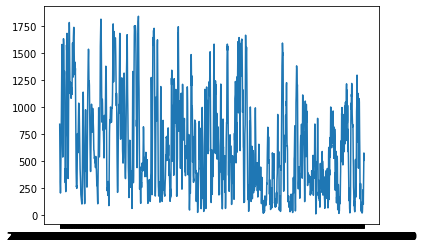

In [8]:
power.info()
plt.plot(power["wind_power"][:2000])
plt.show()

In [4]:
power.max()

wind_power    2283
horizon         24
dtype: int64

In [5]:
power.min()

wind_power    3
horizon       3
dtype: int64

In [30]:
a = ensembles.groupby(level=0).mean().head(20)

In [29]:
ensembles["u100"].iloc[50:100].mean()

4.0282890916220255

In [35]:
a.columns.__len__()

5

In [32]:
ensembles.reset_index().pivot(index="time", columns="number").columns

MultiIndex([( 'u100',  1),
            ( 'u100',  2),
            ( 'u100',  3),
            ( 'u100',  4),
            ( 'u100',  5),
            ( 'u100',  6),
            ( 'u100',  7),
            ( 'u100',  8),
            ( 'u100',  9),
            ( 'u100', 10),
            ...
            ('speed', 41),
            ('speed', 42),
            ('speed', 43),
            ('speed', 44),
            ('speed', 45),
            ('speed', 46),
            ('speed', 47),
            ('speed', 48),
            ('speed', 49),
            ('speed', 50)],
           names=[None, 'number'], length=250)

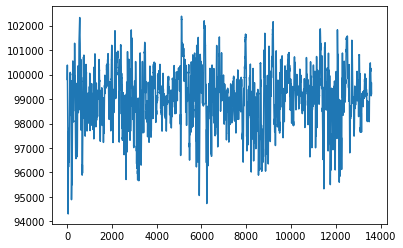

In [43]:
plt.plot(ensembles.loc[(slice(None),1),"sp"].values)
plt.show()

In [42]:
ensembles.loc[(slice(None),1),"sp"].values

array([ 99801.87617282,  99875.34257047, 100068.13486242, ...,
        99427.91765436,  99327.07072148,  99218.89411074])

In [44]:
observations.head(20)

,u100,v100,t2m,sp,speed
time,,,,,
2015-01-05 03:00:00,5.104026,-5.307516,270.076136,99706.983138,7.451687
2015-01-05 06:00:00,4.154993,-5.153030,269.645744,99790.363926,6.795018
2015-01-05 09:00:00,2.925575,-4.673106,269.788613,99979.541495,5.849405
2015-01-05 12:00:00,1.410963,-3.247739,271.547095,100052.494669,4.239581
2015-01-05 15:00:00,1.008390,-1.470124,269.742654,100177.091760,3.342879
2015-01-05 18:00:00,0.110559,1.171557,268.615768,100248.329572,3.010571
2015-01-05 21:00:00,0.012201,3.498421,268.441913,100314.203859,4.488092
2015-01-06 00:00:00,0.349186,4.781799,268.912723,100321.503070,5.301152
2015-01-06 03:00:00,-0.590974,5.605306,269.938452,100303.626836,5.902383


In [53]:
nobs = pd.DataFrame(index=ensembles.index, columns= power.columns)

In [54]:
nobs

wind_power
time                number           
2015-01-05 03:00:00 1             NaN
                    2             NaN
                    3             NaN
                    4             NaN
                    5             NaN
...                               ...
2019-08-31 21:00:00 46            NaN
                    47            NaN
                    48            NaN
                    49            NaN
                    50            NaN

[679950 rows x 1 columns]

In [56]:
nobs["wind_power"] = pd.Series(nobs.index.get_level_values(0)).map(power).values

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [64]:
nobs.index.get_level_values(0).map(power[])

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().